# Autómata de Doble Pila

Ejemplifica la creación de un autómata de doble pila

In [1]:
from maquinas.recursivelyenumerable.tspda import TwoStackPushDownAutomaton as PDA2
from maquinas.simulation import Simulation

In [2]:
# Creating automata finito
aⁿbⁿcⁿ=PDA2(Q=['q_0','q_1','q_2','q_3'],
         sigma=['a','b'],
         gamma=['A'],
         q_0='q_0',
         A=['q_3'],
         delta=[
            (('q_0','a','Z0','Z0'),[('q_0','AZ0','AZ0')]),
            (('q_0','a','A','A'),[('q_0','AA','AA')]),
            (('q_0','b','A','A'),[('q_1','epsilon','A')]),
            (('q_1','b','A','A'),[('q_1','epsilon','A')]),
            (('q_1','c','Z0','A'),[('q_2','Z0','epsilon')]),
            (('q_2','c','Z0','A'),[('q_2','Z0','epsilon')]),
            (('q_2','epsilon','Z0','Z0'),[('q_3','Z0','Z0')]),
         ]
    )

In [3]:
print(aⁿbⁿcⁿ.summary())

States  : q_0, q_1, q_2, q_3
Sigma   : ε, a, b, c
Gamma   : ε, Z₀, A, a, b, c
Initial : q_0
Aceptors: q_3
Transitions:
 q_0,a,Z₀/AZ₀,Z₀/AZ₀ → q_0
 q_0,a,A/AA,A/AA → q_0
 q_0,b,A/ε,A/A → q_1
 q_1,b,A/ε,A/A → q_1
 q_1,c,Z₀/Z₀,A/ε → q_2
 q_2,c,Z₀/Z₀,A/ε → q_2
 q_2,ε,Z₀/Z₀,Z₀/Z₀ → q_3


In [4]:
for q,a,w_ in aⁿbⁿcⁿ.delta_stepwise("aaabbbccc"):
    if a:
        print(f"{a} -> {aⁿbⁿcⁿ.states2string(q)}", end=",\n ")
    else:
        print(f"{aⁿbⁿcⁿ.states2string(q)}",end="\n ")
    res=q
    
print(f"\nCon {aⁿbⁿcⁿ.states2string(res)} Se acepta?", "Sí" if aⁿbⁿcⁿ.acceptor(res) else "No" )

q_0, Z₀]① Z₀]②
 a -> q_0, A Z₀]① A Z₀]②,
 a -> q_0, A A Z₀]① A A Z₀]②,
 a -> q_0, A A A Z₀]① A A A Z₀]②,
 b -> q_1, A A Z₀]① A A A Z₀]②,
 b -> q_1, A Z₀]① A A A Z₀]②,
 b -> q_1, Z₀]① A A A Z₀]②,
 c -> q_2, Z₀]① A A Z₀]②,
 c -> q_2, Z₀]① A Z₀]②,
 c -> q_2, Z₀]① Z₀]② | q_3, Z₀]① Z₀]②,
 
Con q_2, Z₀]① Z₀]② | q_3, Z₀]① Z₀]② Se acepta? Sí


In [5]:
res=aⁿbⁿcⁿ.delta_extended(None,"aab")
print(f"Con {aⁿbⁿcⁿ.states2string(res)} Se acepta?", "Sí" if aⁿbⁿcⁿ.acceptor(res) else "No" )

Con q_1, A Z₀]① A A Z₀]② Se acepta? No


In [6]:
res=aⁿbⁿcⁿ.delta_extended(None,"aabb")
print(f"Con {aⁿbⁿcⁿ.states2string(res)} Se acepta?", "Sí" if aⁿbⁿcⁿ.acceptor(res) else "No" )

Con q_1, Z₀]① A A Z₀]② Se acepta? No


In [7]:
s=Simulation(aⁿbⁿcⁿ,"aaabbbccc")
s.run()

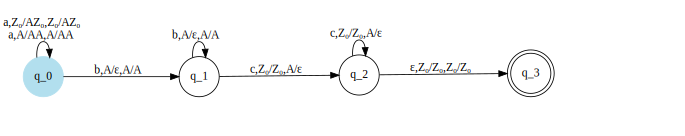

In [8]:
aⁿbⁿcⁿ.graph()

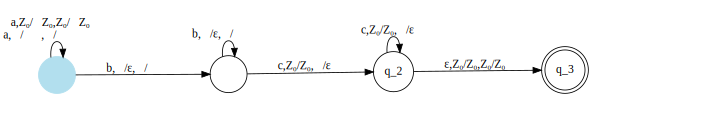

In [9]:
aⁿbⁿcⁿ.graph(symbols={'A':'🌵'},states={'q_0':'🤣','q_1':'🤗'})

In [10]:
aⁿbⁿcⁿ.table()

,a,b,c,ε
⟶q_0,"a,Z₀/AZ₀,Z₀/AZ₀a,A/AA,A/AA","b,A/ε,A/A",∅,∅
q_1,∅,"b,A/ε,A/A","c,Z₀/Z₀,A/ε",∅
q_2,∅,∅,"c,Z₀/Z₀,A/ε","ε,Z₀/Z₀,Z₀/Z₀"
q_3,∅,∅,∅,∅


In [11]:
aⁿbⁿcⁿ.save_gif('aaabbbccc')